In [2]:
from glob import glob
import os

import torch
from data_utils import CustomDataModule
from train_mia_ray import argparser

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import torch

fig_name="best"
prediction_output_dir = './models/imagenet-1k_cifar100/0_16_0_16/mia/gaussian_qmia/facebook/convnext-large-224-22k-1k/use_hinge_True/use_target_label_False/use_target_inputs_False/cls_drop_/predictions/best'
# prediction_output_dir = './models/cinic10_cifar100/0_16_0_16/mia/gaussian_qmia/facebook/convnext-large-224-22k-1k/use_hinge_True/use_target_label_False/use_target_inputs_False/cls_drop_/predictions/best'

predict_results = None
for file in glob(os.path.join(prediction_output_dir, "*.pt")):
    print(file)
    rank_predict_results = torch.load(file)
    if predict_results is None:
        predict_results = rank_predict_results
    else:
        for r, p in zip(rank_predict_results, predict_results):
            p.extend(r)

def join_list_of_tuples(list_of_tuples):
    n_tuples = len(list_of_tuples[0])
    result = []
    for _ in range(n_tuples):
        try:
            result.append(torch.concat([t[_] for t in list_of_tuples]))
        except:
            result.append(torch.Tensor([t[_] for t in list_of_tuples]))
    return result

(
    private_predicted_quantile_threshold,
    private_target_score,
    private_loss,
    private_base_acc1,
    private_base_acc5,
    private_targets,
    private_z_scores,
    private_target_logits,
) = join_list_of_tuples(predict_results[-1])
(
    test_predicted_quantile_threshold,
    test_target_score,
    test_loss,
    test_base_acc1,
    test_base_acc5,
    test_targets,
    test_z_scores,
    test_target_logits,
) = join_list_of_tuples(predict_results[1])

./models/imagenet-1k_cifar100/0_16_0_16/mia/gaussian_qmia/facebook/convnext-large-224-22k-1k/use_hinge_True/use_target_label_False/use_target_inputs_False/cls_drop_/predictions/best/predictions_1.pt
./models/imagenet-1k_cifar100/0_16_0_16/mia/gaussian_qmia/facebook/convnext-large-224-22k-1k/use_hinge_True/use_target_label_False/use_target_inputs_False/cls_drop_/predictions/best/predictions_2.pt
./models/imagenet-1k_cifar100/0_16_0_16/mia/gaussian_qmia/facebook/convnext-large-224-22k-1k/use_hinge_True/use_target_label_False/use_target_inputs_False/cls_drop_/predictions/best/predictions_0.pt
./models/imagenet-1k_cifar100/0_16_0_16/mia/gaussian_qmia/facebook/convnext-large-224-22k-1k/use_hinge_True/use_target_label_False/use_target_inputs_False/cls_drop_/predictions/best/predictions_3.pt


In [43]:
fig_name="cifar100"
prediction_output_dir = './models/imagenet-1k_cifar100/0_16_0_16/mia/gaussian_qmia/facebook/convnext-large-224-22k-1k/use_hinge_True/use_target_label_False/use_target_inputs_False/cls_drop_/predictions/cifar100'
# prediction_output_dir = './models/cinic10_cifar100/0_16_0_16/mia/gaussian_qmia/facebook/convnext-large-224-22k-1k/use_hinge_True/use_target_label_False/use_target_inputs_False/cls_drop_/predictions/best'

predict_results = None
for file in glob(os.path.join(prediction_output_dir, "*.pt")):
    print(file)
    rank_predict_results = torch.load(file)
    if predict_results is None:
        predict_results = rank_predict_results
    else:
        for r, p in zip(rank_predict_results, predict_results):
            p.extend(r)

def join_list_of_tuples(list_of_tuples):
    n_tuples = len(list_of_tuples[0])
    result = []
    for _ in range(n_tuples):
        try:
            result.append(torch.concat([t[_] for t in list_of_tuples]))
        except:
            result.append(torch.Tensor([t[_] for t in list_of_tuples]))
    return result

(
    c100_private_predicted_quantile_threshold,
    c100_private_target_score,
    c100_private_loss,
    c100_private_base_acc1,
    c100_private_base_acc5,
    c100_private_targets,
    c100_private_z_scores,
    c100_private_target_logits,
) = join_list_of_tuples(predict_results[-1])
(
    c100_test_predicted_quantile_threshold,
    c100_test_target_score,
    c100_test_loss,
    c100_test_base_acc1,
    c100_test_base_acc5,
    c100_test_targets,
    c100_test_z_scores,
    c100_test_target_logits,
) = join_list_of_tuples(predict_results[1])

./models/imagenet-1k_cifar100/0_16_0_16/mia/gaussian_qmia/facebook/convnext-large-224-22k-1k/use_hinge_True/use_target_label_False/use_target_inputs_False/cls_drop_/predictions/cifar100/predictions_0.pt


In [ ]:
from matplotlib import pyplot as plt

# Plot c100 test scores against imagenet test scores
plt.figure(figsize=(10, 6))
plt.hist(c100_private_target_score, bins=100, alpha=0.5, density=True, label='CIFAR-100 Private Target Score')
plt.hist(private_target_score, bins=100, alpha=0.5, density=True, label='ImageNet Private Target Score')
plt.xlim(0,10)
plt.xlabel('Target Score')
plt.ylabel('Frequency')
plt.title('CIFAR-100 vs ImageNet Private Target Score')
plt.legend() 

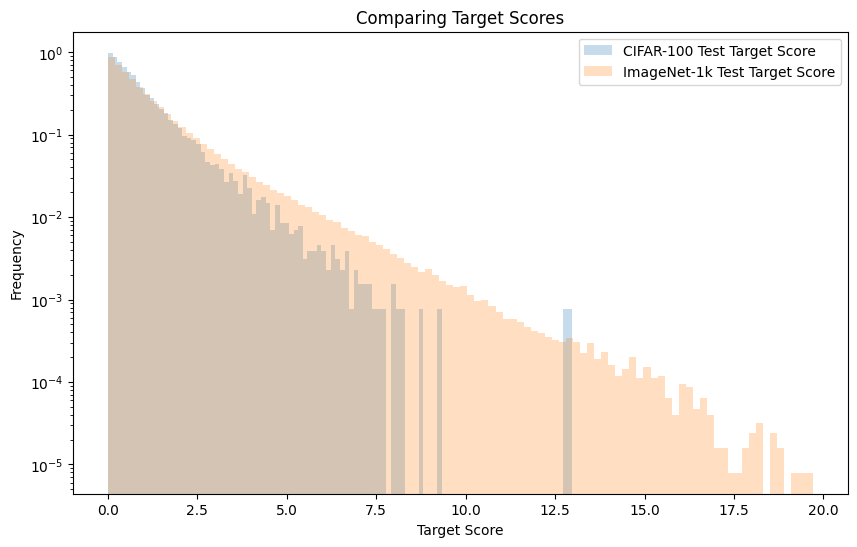

In [ ]:
from matplotlib import pyplot as plt

# Plot c100 test scores against imagenet test scores
plt.figure(figsize=(10, 6))
plt.hist(c100_test_target_score, bins=100, alpha=0.25, density=True, label='CIFAR-100 Test Target Score')
plt.hist(c100_private_target_score, bins=100, alpha=0.25, density=True, label='CIFAR-100 Private Target Score')
plt.hist(private_target_score, bins=100, alpha=0.25, density=True, label='ImageNet-1k Private Target Score (MEMBERS)')
plt.hist(test_target_score, bins=100, alpha=0.25, density=True, label='ImageNet-1k Test Target Score')
plt.yscale('log')
plt.xlabel('Target Score')
plt.ylabel('Frequency')
plt.title('Comparing Target Scores')
plt.legend()

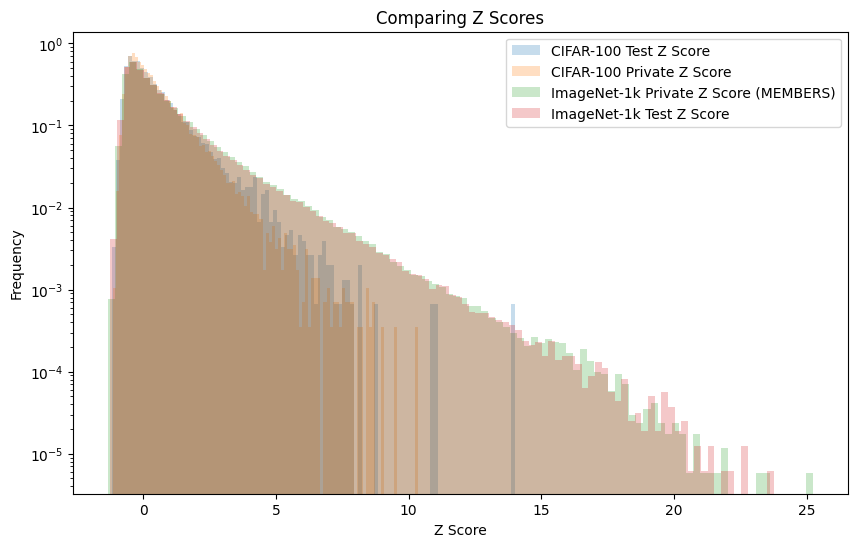

In [66]:
from matplotlib import pyplot as plt

# Plot c100 test scores against imagenet test scores
plt.figure(figsize=(10, 6))
plt.hist(c100_test_z_scores, bins=100, alpha=0.25, density=True, label='CIFAR-100 Test Z Score')
plt.hist(c100_private_z_scores, bins=100, alpha=0.25, density=True, label='CIFAR-100 Private Z Score')
plt.hist(private_z_scores, bins=100, alpha=0.25, density=True, label='ImageNet-1k Private Z Score (MEMBERS)')
plt.hist(test_z_scores, bins=100, alpha=0.25, density=True, label='ImageNet-1k Test Z Score')
plt.yscale('log')
plt.xlabel('Z Score')
plt.ylabel('Frequency')
plt.title('Comparing Z Scores')
plt.legend() 

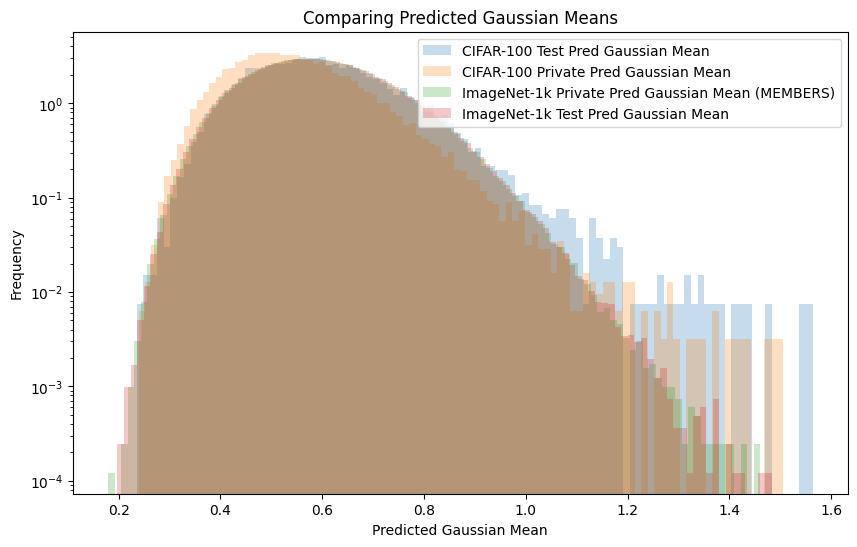

In [65]:
from matplotlib import pyplot as plt

# Plot c100 test scores against imagenet test scores
plt.figure(figsize=(10, 6))
plt.hist(c100_test_predicted_quantile_threshold[:,0], bins=100, alpha=0.25, density=True, label='CIFAR-100 Test Pred Gaussian Mean')
plt.hist(c100_private_predicted_quantile_threshold[:,0], bins=100, alpha=0.25, density=True, label='CIFAR-100 Private Pred Gaussian Mean')
plt.hist(private_predicted_quantile_threshold[:,0], bins=100, alpha=0.25, density=True, label='ImageNet-1k Private Pred Gaussian Mean (MEMBERS)')
plt.hist(test_predicted_quantile_threshold[:,0], bins=100, alpha=0.25, density=True, label='ImageNet-1k Test Pred Gaussian Mean')
plt.yscale('log')
plt.xlabel('Predicted Gaussian Mean')
plt.ylabel('Frequency')
plt.title('Comparing Predicted Gaussian Means')
plt.legend() 

Gutter.

In [92]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

def top_two_margin_scoring_fn(logits):
    # z_{max}(x) - z_{second-max}(x)
    sorted_logits, _ = torch.sort(logits, dim=1, descending=True)
    top_logit = sorted_logits[:, 0]
    second_top_logit = sorted_logits[:, 1]
    score = top_logit - second_top_logit
    return score

def entropy_scoring_fn(logits):
    probabilities = torch.softmax(logits, dim=1)
    entropy = -torch.sum(probabilities * torch.log(probabilities + 1e-12), dim=1)
    return -entropy

def max_confidence_scoring_fn(logits):
    probabilities = torch.softmax(logits, dim=1)
    max_prob, _ = torch.max(probabilities, dim=1)
    return max_prob

def logit_norm_scoring_fn(logits):
    norm = torch.norm(logits, p=2, dim=1)
    return norm

def kl_uniform_scoring_fn(logits):
    probabilities = torch.softmax(logits, dim=1)
    uniform_dist = torch.ones_like(probabilities) / probabilities.size(1)
    kl_div = torch.sum(probabilities * (torch.log(probabilities + 1e-12) - torch.log(uniform_dist)), dim=1)
    return kl_div

def margin_from_avg_logit_scoring_fn(logits):
    avg_logit = torch.mean(logits, dim=1)
    top_logit, _ = torch.max(logits, dim=1)
    return top_logit - avg_logit

def energy_scoring_fn(logits):
    energy = -torch.logsumexp(logits, dim=1)
    return -energy  # higher energy indicates lower confidence, thus negative sign

def gini_index_fn(logits):
    '''Higher when the model’s confidence is concentrated on fewer classes.'''
    p = torch.softmax(logits, dim=1)
    return torch.sum(p * p, dim=1)            # ∑ᵢ pᵢ²

def renyi_collision_entropy_fn(logits):
    '''Rényi entropy of order 2: –log ∑pᵢ², bigger for flatter distributions.'''
    p = torch.softmax(logits, dim=1)
    collision = torch.sum(p * p, dim=1)
    return -torch.log(collision + 1e-12)

def prob_std_fn(logits):
    '''Std dev of the softmax – higher when there’s a big gap between classes.'''
    p = torch.softmax(logits, dim=1)
    return torch.std(p, dim=1)

def l1_l2_ratio_fn(logits):
    '''L₁/L₂ ratio: close to 1 for very “one-hot” p, bigger (≈√C) for flat p.'''
    p = torch.softmax(logits, dim=1)
    l1 = torch.norm(p, p=1, dim=1)
    l2 = torch.norm(p, p=2, dim=1)
    return l1 / (l2 + 1e-12)

def evaluate_score_fn(score_fn, test_target_logits, test_targets, private_target_logits, private_targets):
    test_target_score = score_fn(test_target_logits)
    private_target_score = score_fn(private_target_logits)
    # plt.hist(private_target_score, bins=100, alpha=0.5, label="private_target_score")
    # plt.hist(test_target_score, bins=100, alpha=0.5, label="test_target_score")
    # plt.legend()
    y_true = np.concatenate([np.ones(len(private_target_score)), np.zeros(len(test_target_score))])
    y_score = np.concatenate([private_target_score, test_target_score])
    auc = roc_auc_score(y_true, y_score)
    print(f"AUC: {auc:.4f}")

def normalized_margin_fn(logits):
    # (z₁ − z₂) / ||z||₂
    top2, _  = torch.sort(logits, dim=1, descending=True)
    margin   = top2[:, 0] - top2[:, 1]
    l2_norm  = torch.norm(logits, p=2, dim=1)
    return margin / (l2_norm + 1e-12)

def temperature_scaled_confidence_fn(logits, T=2.0):
    p = torch.softmax(logits / T, dim=1)
    return torch.max(p, dim=1).values

def logit_l1_norm_fn(logits):
    """L1 norm of the logits vector."""
    return torch.norm(logits, p=1, dim=1)


def logit_linfty_norm_fn(logits):
    """L∞ norm (i.e. max absolute logit)."""
    return torch.norm(logits, p=float('inf'), dim=1)


def max_to_l2_ratio_fn(logits):
    """Max logit divided by L2 norm of all logits."""
    max_logit, _ = torch.max(logits, dim=1)
    l2 = torch.norm(logits, p=2, dim=1)
    return max_logit / (l2 + 1e-12)


def margin_ratio_fn(logits):
    """(z_max / z_2nd) — pure ratio of top two logits."""
    top2, _ = torch.sort(logits, dim=1, descending=True)
    return top2[:, 0] / (top2[:, 1] + 1e-12)


def range_normalized_margin_fn(logits):
    """
    (z_max − z_2nd) / (z_max − z_min).
    Normalizes the top-2 margin by the full dynamic range.
    """
    top2, _ = torch.sort(logits, dim=1, descending=True)
    zmax, z2nd = top2[:, 0], top2[:, 1]
    zmin, _   = torch.min(logits, dim=1)
    return (zmax - z2nd) / (zmax - zmin + 1e-12)


def standardized_margin_fn(logits):
    """
    Z-score your logits per sample, then take the top-2 margin.
    (logits − μ)/σ removes both mean‐shift and scale‐shift.
    """
    μ = logits.mean(dim=1, keepdim=True)
    σ = logits.std(dim=1, keepdim=True)
    normed = (logits - μ) / (σ + 1e-12)
    top2, _ = torch.sort(normed, dim=1, descending=True)
    return top2[:, 0] - top2[:, 1]

functions = [
    normalized_margin_fn,
    top_two_margin_scoring_fn,
    entropy_scoring_fn,
    max_confidence_scoring_fn,
    logit_norm_scoring_fn,
    kl_uniform_scoring_fn,
    margin_from_avg_logit_scoring_fn,
    energy_scoring_fn,
    gini_index_fn,
    renyi_collision_entropy_fn,
    prob_std_fn,
    l1_l2_ratio_fn,
    temperature_scaled_confidence_fn,
    logit_l1_norm_fn,
    logit_linfty_norm_fn,
    max_to_l2_ratio_fn,
    margin_ratio_fn,
    range_normalized_margin_fn,
    standardized_margin_fn,
]

for scoring_fn in functions:
    print(scoring_fn.__name__)
    evaluate_score_fn(scoring_fn, test_target_logits, test_targets, private_target_logits, private_targets)

normalized_margin_fn
AUC: 0.5057
top_two_margin_scoring_fn
AUC: 0.5058
entropy_scoring_fn
AUC: 0.5064
max_confidence_scoring_fn
AUC: 0.5071
logit_norm_scoring_fn
AUC: 0.5017
kl_uniform_scoring_fn
AUC: 0.5064
margin_from_avg_logit_scoring_fn
AUC: 0.5055
energy_scoring_fn
AUC: 0.5046
gini_index_fn
AUC: 0.5070
renyi_collision_entropy_fn
AUC: 0.4930
prob_std_fn
AUC: 0.5070
l1_l2_ratio_fn
AUC: 0.4930
temperature_scaled_confidence_fn
AUC: 0.5062
logit_l1_norm_fn
AUC: 0.5014
logit_linfty_norm_fn
AUC: 0.5055
max_to_l2_ratio_fn
AUC: 0.5065
margin_ratio_fn
AUC: 0.5051
range_normalized_margin_fn
AUC: 0.5054
standardized_margin_fn
AUC: 0.5057


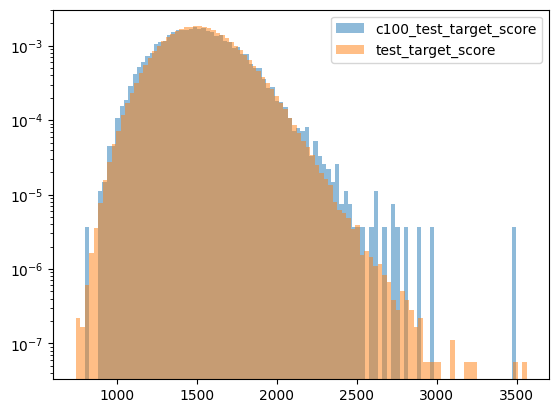

In [91]:
plt.hist(logit_l1_norm_fn(c100_test_target_logits), bins=100, density=True, alpha=0.5, label="c100_test_target_score")
plt.hist(logit_l1_norm_fn(test_target_logits), density=True, bins=100, alpha=0.5, label="test_target_score")
plt.yscale('log')
plt.legend()

In [83]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from torchmetrics.utilities.data import to_onehot

def correct_class_logit_fn(logits, labels):
    correct_logits = logits[torch.arange(len(labels)), labels]
    return correct_logits

def correct_class_probability_fn(logits, labels):
    probabilities = torch.softmax(logits, dim=1)
    correct_probs = probabilities[torch.arange(len(labels)), labels]
    return correct_probs

def true_label_margin_fn(logits, labels):
    correct_logits = logits[torch.arange(len(labels)), labels]
    masked_logits = logits.clone()
    masked_logits[torch.arange(len(labels)), labels] = -float('inf')
    second_highest_logits, _ = torch.max(masked_logits, dim=1)
    margin = correct_logits - second_highest_logits
    return margin

def logit_ratio_fn(logits, labels):
    correct_logits = logits[torch.arange(len(labels)), labels]
    masked_logits = logits.clone()
    masked_logits[torch.arange(len(labels)), labels] = float('-inf')
    mean_other_logits = torch.mean(masked_logits, dim=1)
    ratio = correct_logits - mean_other_logits
    return ratio

def label_logit_and_hinge_scoring_fn(logits, label): # same as true_label_margin_fn
    # z_y(x)-max_{y'\neq y} z_{y'}(x)
    oh_label = to_onehot(label, logits.shape[-1]).bool()
    score = logits[oh_label]
    score -= torch.max(logits[~oh_label].view(logits.shape[0], -1), dim=1)[0]
    return score

def loss_based_scoring_fn(logits, labels):
    loss = torch.nn.functional.cross_entropy(logits, labels, reduction='none')
    return -loss  # Lower loss (members) yield higher scores

def weighted_multi_margin_scoring_fn(logits, labels, decay=0.5):
    """
    For each example, compute:
      score = sum_{k=1..C-1} decay^(k-1) * [ z_true – z_{(k)} ]
    where z_{(k)} are the other-class logits sorted descending.
    """
    batch_size, num_classes = logits.shape
    arange = torch.arange(batch_size, device=logits.device)

    # 1) Grab the true-class logit
    true_logits = logits[arange, labels].unsqueeze(1)  # (B, 1)

    # 2) Mask out the true class, so it's effectively -inf
    other_logits = logits.clone()
    other_logits[arange, labels] = float('-inf')

    # 3) Sort the *other* logits descending
    sorted_other, _ = torch.sort(other_logits, dim=1, descending=True)

    # 4) Drop the last column (the -inf you injected)
    sorted_other = sorted_other[:, :-1]               # now (B, C-1)

    # 5) Compute margins to *all* other logits
    margins = true_logits - sorted_other              # (B, C-1)

    # 6) Build decay weights [1, decay, decay^2, …]
    ranks = torch.arange(num_classes - 1, device=logits.device, dtype=logits.dtype)
    weights = decay ** ranks                          # (C-1,)

    # 7) Weighted sum of margins
    weighted_margins = margins * weights.unsqueeze(0) # broadcasts to (B, C-1)
    score = weighted_margins.sum(dim=1)               # (B,)

    return score

def evaluate_score_fn(score_fn, test_target_logits, test_targets, private_target_logits, private_targets):
    test_target_score = score_fn(test_target_logits, test_targets)
    private_target_score = score_fn(private_target_logits, private_targets)
    # plt.hist(private_target_score, bins=100, alpha=0.5, label="private_target_score")
    # plt.hist(test_target_score, bins=100, alpha=0.5, label="test_target_score")
    # plt.legend()
    y_true = np.concatenate([np.ones(len(private_target_score)), np.zeros(len(test_target_score))])
    y_score = np.concatenate([private_target_score, test_target_score])
    auc = roc_auc_score(y_true, y_score)
    print(f"AUC: {auc:.4f}")


functions = [
    weighted_multi_margin_scoring_fn,
    correct_class_logit_fn,
    correct_class_probability_fn,
    true_label_margin_fn,
    loss_based_scoring_fn,
]

for scoring_fn in functions:
    print(scoring_fn.__name__)
    evaluate_score_fn(scoring_fn, test_target_logits, test_targets, c100_test_target_logits, c100_test_targets)

weighted_multi_margin_scoring_fn
AUC: 0.0266
correct_class_logit_fn
AUC: 0.0296
correct_class_probability_fn
AUC: 0.0239
true_label_margin_fn
AUC: 0.0309
loss_based_scoring_fn
AUC: 0.0239


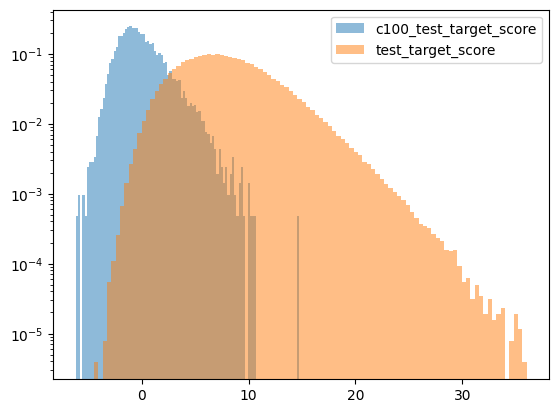

In [84]:
plt.hist(correct_class_logit_fn(c100_test_target_logits, c100_test_targets), bins=100, density=True, alpha=0.5, label="c100_test_target_score")
plt.hist(correct_class_logit_fn(test_target_logits, test_targets), density=True, bins=100, alpha=0.5, label="test_target_score")
plt.yscale('log')
plt.legend()